https://github.com/DahnJ/H3-Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import h3pandas

import os, warnings
import re
warnings.filterwarnings(action = 'ignore')

In [2]:
# Download and subset data
shop = pd.read_csv('소상공인시장진흥공단_상가(상권)정보_서울_202203.csv')
shop

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,...,1111015200100440000000001,금사랑투빌딩,서울특별시 종로구 서순라길 17-10,110390,3138.0,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,...,1171011100101970003017195,NaN,서울특별시 송파구 위례성대로12길 31,138834,5640.0,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312806,18171213,네일프렌들리,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,...,1171010800102130000000001,문정현대지식산업센터1-1,서울특별시 송파구 법원로11길 11,138888,5836.0,1,1,NaN,127.118424,37.484759
312807,18146778,코드짐,신길점,P,스포츠,P02,실내운동시설,P02A13,헬스클럽,R91132,...,1156013200104660013000001,NaN,서울특별시 영등포구 영등포로84길 16,150853,7356.0,NaN,5,NaN,126.921695,37.511835
312808,18171760,진디자인,NaN,F,생활서비스,F12,광고/인쇄,F12A01,인쇄종합,C18119,...,1138010600102160007025289,NaN,서울특별시 은평구 연서로22길 9-16,122844,3387.0,NaN,2,NaN,126.919811,37.614986
312809,18174899,디씨엔터테인먼트,NaN,F,생활서비스,F20,행사/이벤트,F20A05,연예인대리업,M73901,...,1168010800102260001000001,NaN,서울특별시 강남구 논현로118길 28,135829,6107.0,NaN,1,NaN,127.035179,37.510257


In [3]:
# 음식점만 추출
food = shop[shop["상권업종대분류명"].str.contains('음식')]
food

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375
5,17174119,쓰리에프,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1159010700101390073009536,NaN,서울특별시 동작구 동작대로27가길 12,156816,7008.0,NaN,NaN,NaN,126.980952,37.487105
6,17174096,채움,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1111012400100580000017956,두산위브파빌리온,서울특별시 종로구 삼봉로 81,110858,3150.0,NaN,NaN,NaN,126.981794,37.572387
7,17174040,다향,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010800114850004022127,NaN,서울특별시 서초구 효령로 230,137869,6709.0,NaN,1,NaN,127.009382,37.483436
8,25530299,고향생막걸리,NaN,Q,음식,Q09,유흥주점,Q09A04,민속주점,I56219,...,1168010700106150001009703,코끼리상가,서울특별시 강남구 압구정로 216,135894,6023.0,NaN,1,NaN,127.031012,37.528073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312594,18148766,브런치&다이닝37.5,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1135010400102560009013454,NaN,서울특별시 노원구 노원로 238,139231,1750.0,NaN,1,NaN,127.074769,37.639226
312613,18147814,수르점빵,NaN,Q,음식,Q08,제과제빵떡케익,Q08A01,제과점,I56191,...,1138010300102050001037104,NaN,서울특별시 은평구 연서로34길 26-7,122853,3348.0,NaN,NaN,NaN,126.929479,37.621661
312718,18148379,멍지트,NaN,Q,음식,Q12,커피점/카페,Q12A07,애견카페,I56220,...,1162010200114260007013732,가야위드안,서울특별시 관악구 봉천로12길 39,151891,8753.0,NaN,NaN,NaN,126.930091,37.487015
312768,18149933,베이,NaN,Q,음식,Q08,제과제빵떡케익,Q08A02,케익전문점,I56191,...,1156010800100290001032915,포레나영등포센트럴,서울특별시 영등포구 국회대로50길 20,150030,7246.0,NaN,1,NaN,126.905662,37.523770


In [4]:
# '상권업종대분류명' 을 int로 변경하여 grouping 하였을 때 개수 셀 수 있도록 변환
food['상권업종대분류명'] = 1
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100783 entries, 4 to 312802
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     100783 non-null  int64  
 1   상호명        100783 non-null  object 
 2   지점명        27757 non-null   object 
 3   상권업종대분류코드  100783 non-null  object 
 4   상권업종대분류명   100783 non-null  int64  
 5   상권업종중분류코드  100783 non-null  object 
 6   상권업종중분류명   100783 non-null  object 
 7   상권업종소분류코드  100783 non-null  object 
 8   상권업종소분류명   100783 non-null  object 
 9   표준산업분류코드   100523 non-null  object 
 10  표준산업분류명    100523 non-null  object 
 11  시도코드       100783 non-null  int64  
 12  시도명        100783 non-null  object 
 13  시군구코드      100783 non-null  int64  
 14  시군구명       100783 non-null  object 
 15  행정동코드      100783 non-null  int64  
 16  행정동명       100783 non-null  object 
 17  법정동코드      100783 non-null  int64  
 18  법정동명       100783 non-null  object 
 19  지번코드       100783 non-n

In [5]:
# 음식점, 위도, 경도
df = food.rename({'경도': 'lng', '위도': 'lat'}, axis=1)[['상호명','상권업종대분류명','lng', 'lat']]
df

,상호명,상권업종대분류명,lng,lat
4,비지트,1,126.991394,37.488375
5,쓰리에프,1,126.980952,37.487105
6,채움,1,126.981794,37.572387
7,다향,1,127.009382,37.483436
8,고향생막걸리,1,127.031012,37.528073
...,...,...,...,...
312594,브런치&다이닝37.5,1,127.074769,37.639226
312613,수르점빵,1,126.929479,37.621661
312718,멍지트,1,126.930091,37.487015
312768,베이,1,126.905662,37.523770


In [ ]:
#Only use the central part of the data
qt = 0.1
df = df.loc[(df['lng'] > df['lng'].quantile(qt)) & (df['lng'] < df['lng'].quantile(1-qt)) 
            & (df['lat'] > df['lat'].quantile(qt)) & (df['lat'] < df['lat'].quantile(1-qt))]
df

In [ ]:
'''H3-Pandas
Basic H3 API
geo_to_h3
We can use geo_to_h3 to add an index with H3 addresses resolution 10

geo_to_h3 assumes coordinates are in epsg=4326

NOTE: geo_to_h3 also works with POINT GeoDataFrames'''

In [6]:
dfh3 = df.h3.geo_to_h3(10)
dfh3.head()

,상호명,상권업종대분류명,lng,lat
h3_10,,,,
8a30e1d9b4dffff,비지트,1,126.991394,37.488375
8a30e1d9a29ffff,쓰리에프,1,126.980952,37.487105
8a30e1d8ca97fff,채움,1,126.981794,37.572387
8a30e1cb50affff,다향,1,127.009382,37.483436
8a30e1ca546ffff,고향생막걸리,1,127.031012,37.528073


<AxesSubplot:xlabel='lng', ylabel='lat'>

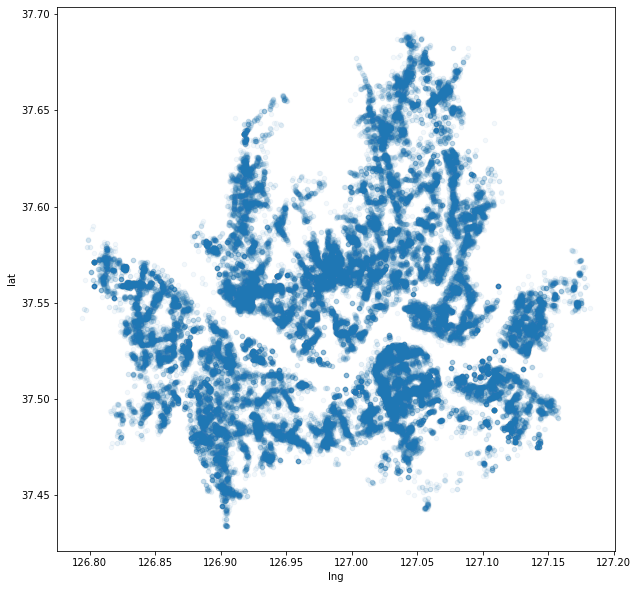

In [7]:
df.plot.scatter(x='lng', y='lat', figsize=(10,10), alpha=0.05)

In [8]:
# h3_to_geo_boundary()
dfh3 = dfh3.drop(columns=['lng', 'lat']).groupby('h3_10').sum()
dfh3

,상권업종대분류명
h3_10,
8a30e03449a7fff,12
8a30e0360007fff,6
8a30e036001ffff,2
8a30e0360027fff,10
8a30e036002ffff,52
...,...
8a30e1db6c67fff,1
8a30e1db6c6ffff,4
8a30e1db6d4ffff,4


In [9]:
# We can now add a H3 hexagonal geometry to each row
gdfh3 = dfh3.h3.h3_to_geo_boundary()
gdfh3.head()

,상권업종대분류명,geometry
h3_10,,
8a30e03449a7fff,12,"POLYGON ((126.90521 37.43365, 126.90513 37.434..."
8a30e0360007fff,6,"POLYGON ((126.89759 37.45942, 126.89752 37.460..."
8a30e036001ffff,2,"POLYGON ((126.89827 37.45853, 126.89819 37.459..."
8a30e0360027fff,10,"POLYGON ((126.89692 37.46032, 126.89684 37.460..."
8a30e036002ffff,52,"POLYGON ((126.89804 37.46038, 126.89797 37.461..."


<AxesSubplot:>

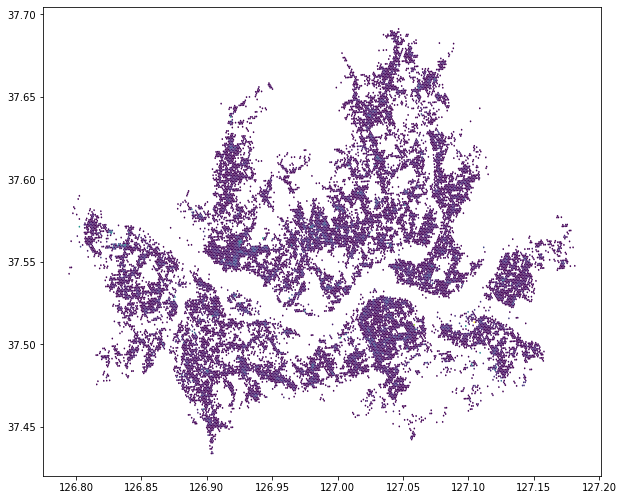

In [10]:
seoul_far = gdfh3.plot(column='상권업종대분류명', figsize=(10, 10))
seoul_far

In [11]:
# If we want to perform the analysis on a coarser resolution, we can use h3_to_parent
gdfh3_9 = gdfh3.h3.h3_to_parent(9)
gdfh3_9.head()

,상권업종대분류명,geometry,h3_09
h3_10,,,
8a30e03449a7fff,12,"POLYGON ((126.90521 37.43365, 126.90513 37.434...",8930e03449bffff
8a30e0360007fff,6,"POLYGON ((126.89759 37.45942, 126.89752 37.460...",8930e036003ffff
8a30e036001ffff,2,"POLYGON ((126.89827 37.45853, 126.89819 37.459...",8930e036003ffff
8a30e0360027fff,10,"POLYGON ((126.89692 37.46032, 126.89684 37.460...",8930e036003ffff
8a30e036002ffff,52,"POLYGON ((126.89804 37.46038, 126.89797 37.461...",8930e036003ffff


In [12]:
# Again, we pretend that we cannot use aggregation functions and perform the operations manually.
gdfh3_9 = gdfh3_9.set_index('h3_09').groupby('h3_09').sum().h3.h3_to_geo_boundary()
gdfh3_9.head()

,상권업종대분류명,geometry
h3_09,,
8930e03449bffff,12,"POLYGON ((126.90700 37.43281, 126.90626 37.434..."
8930e036003ffff,70,"POLYGON ((126.89872 37.45949, 126.89797 37.461..."
8930e036007ffff,21,"POLYGON ((126.90142 37.46057, 126.90067 37.462..."
8930e03600bffff,5,"POLYGON ((126.89849 37.45667, 126.89774 37.458..."
8930e03600fffff,19,"POLYGON ((126.90119 37.45775, 126.90044 37.459..."


<AxesSubplot:>

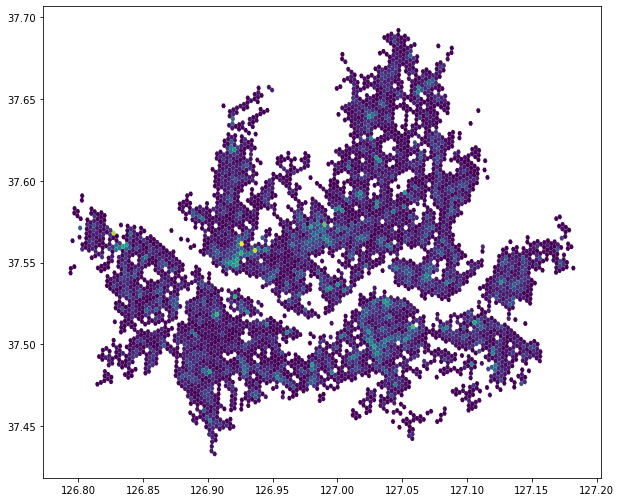

In [13]:
seoul_near = gdfh3_9.plot(column='상권업종대분류명', figsize=(10, 10))
seoul_near

### H3-Pandas Extended API: The same workflow, streamlined

In [14]:
gdfh3_9_alt = df.h3.geo_to_h3_aggregate(10, return_geometry=False).h3.h3_to_parent_aggregate(9)

<AxesSubplot:>

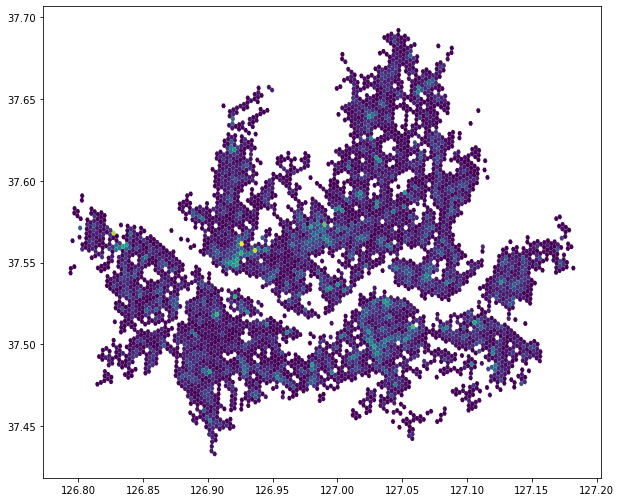

In [15]:
gdfh3_9_alt.plot(column='상권업종대분류명', figsize=(10, 10))

In [18]:
## 파일 저장하기
gdfh3.columns = ['value', 'geometry']
gdfh3

,value,geometry
h3_10,,
8a30e03449a7fff,12,"POLYGON ((126.90521 37.43365, 126.90513 37.434..."
8a30e0360007fff,6,"POLYGON ((126.89759 37.45942, 126.89752 37.460..."
8a30e036001ffff,2,"POLYGON ((126.89827 37.45853, 126.89819 37.459..."
8a30e0360027fff,10,"POLYGON ((126.89692 37.46032, 126.89684 37.460..."
8a30e036002ffff,52,"POLYGON ((126.89804 37.46038, 126.89797 37.461..."
...,...,...
8a30e1db6c67fff,1,"POLYGON ((126.86190 37.54443, 126.86182 37.545..."
8a30e1db6c6ffff,4,"POLYGON ((126.86302 37.54450, 126.86295 37.545..."
8a30e1db6d4ffff,4,"POLYGON ((126.86122 37.54533, 126.86115 37.545..."


In [20]:
gdfh3.to_csv("seoul_h3.csv")